# 4.10 Instacart Analysis Final Report Part 1

## This script contain following points:

### 01. Consider any security implications that might exist for this new data

### 02. Customer behavior in different geographic areas

### 03. Create an exclusion flag for low-activity customers and exclude them from the data

### 04. Export new dataframes as pickle files

## 01. Import libraries

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## 02. Import dataset

In [3]:
# Create path
path = r'C:\Users\Quinn\OneDrive\Documents\CF - Data Analyst\Data Immersion\Instacart Basket Analysis'

In [4]:
# Import prepared dataset
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all.pkl'))

In [5]:
# Import department dataset
department = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

In [6]:
df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,first_order,product_id,add_to_cart_order,reordered,...,Customer_frequency,frequency_flag,Gender,STATE,Age,date_joined,dependants,family_status,income,_merge
0,2539329,1,1,2,8,NaN,First Order,196,1,0,...,20.5,Non_frequent_customer,Female,Alabama,31,2019-02-17,3,married,40423,both
1,2398795,1,2,3,7,15.0,Repeat Customer,196,1,1,...,20.5,Non_frequent_customer,Female,Alabama,31,2019-02-17,3,married,40423,both
2,473747,1,3,3,12,21.0,Repeat Customer,196,1,1,...,20.5,Non_frequent_customer,Female,Alabama,31,2019-02-17,3,married,40423,both
3,2254736,1,4,4,7,29.0,Repeat Customer,196,1,1,...,20.5,Non_frequent_customer,Female,Alabama,31,2019-02-17,3,married,40423,both
4,431534,1,5,4,15,28.0,Repeat Customer,196,1,1,...,20.5,Non_frequent_customer,Female,Alabama,31,2019-02-17,3,married,40423,both


In [7]:
df.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_last_order', 'first_order',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', 'price_range_loc', 'busiest day',
       'busiest days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'avg_price', 'spender_flag', 'Customer_frequency', 'frequency_flag',
       'Gender', 'STATE', 'Age', 'date_joined', 'dependants', ' family_status',
       'income', '_merge'],
      dtype='object')

In [8]:
df.shape

(32404854, 32)

## 03. Consider any security implications that might exist for this new data

#### The original PII data, such as first name and last name, has been dropped from this dataset to ensure the privacy and ethics of the data. 

#### Other information such as income, age, state, gender, dependants, and family status has been fabricated for this course.

## 04. Customer behavior in different geographic areas

### 4.1. Creat a region flag column

In [9]:
# Identify Northeast region
northeast = ['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']

In [10]:
# Identify Midwest region
midwest = ['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']

In [11]:
# Identify South region
south = ['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia',
'Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']

In [12]:
# Identify West region
west = ['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii']

In [13]:
# Creat the Region flag
df.loc[df['STATE'].isin(northeast), 'region'] = 'Northeast'

In [14]:
df.loc[df['STATE'].isin(midwest), 'region'] = 'Midwest'

In [15]:
df.loc[df['STATE'].isin(south), 'region'] = 'South'

In [16]:
df.loc[df['STATE'].isin(west), 'region'] = 'West'

In [17]:
# User count by region
df['region'].value_counts(dropna = False)

region
South        10791880
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

#### The total count is 32,404,854, meaning all the rows are flagged.

### 4.2 Spending habits

In [18]:
# Low/high spender based on regions
spender_region = pd.crosstab(df['region'], df['spender_flag'], dropna = False).sort_values(by = 'High spender', ascending = False)

In [19]:
spender_region

spender_flag,High spender,Low spender
region,,
South,209691,10582189
West,160354,8132559
Midwest,155975,7441350
Northeast,108225,5614511


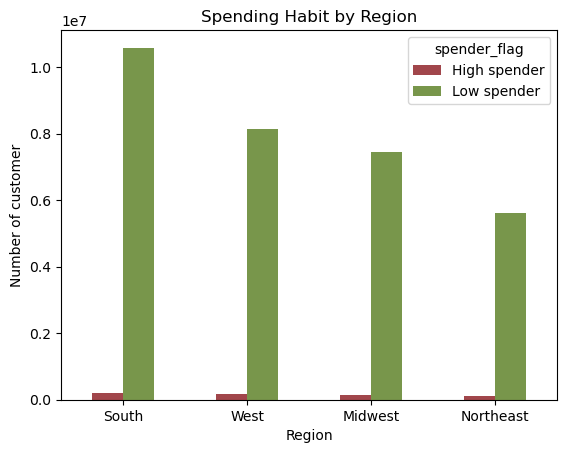

In [20]:
# Visualize this information
bar_spender_region = spender_region.plot.bar(color = ['#a1464b','#78964b'], rot = 0)
plt.title('Spending Habit by Region')
plt.xlabel('Region')
plt.ylabel('Number of customer')
plt.show()

In [21]:
# Exporting chart
bar_spender_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_spending_by_region.png'))

In [22]:
# Price-range product by region
price_region = pd.crosstab(df['region'], df['price_range_loc'], dropna = False).sort_values(by = 'High-range product', ascending = False)

In [23]:
price_region

price_range_loc,High-range product,Low-range product,Mid-range product
region,,,
South,139390,3368336,7284154
West,107168,2592736,5593009
Midwest,97918,2372304,5127103
Northeast,73202,1792943,3856591


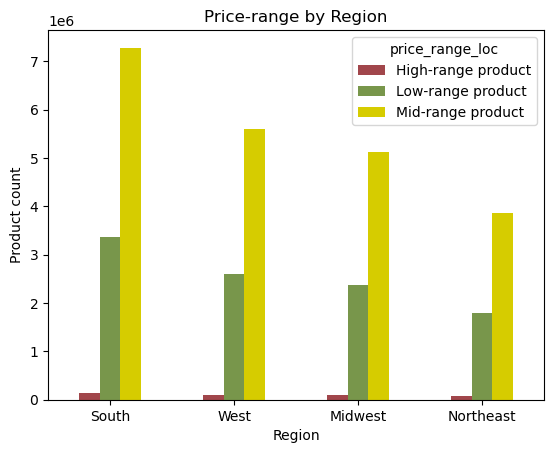

In [24]:
# Visualize this information
bar_price_region = price_region.plot.bar(color = ['#a1464b','#78964b','#d6cc00'], rot = 0)
plt.title('Price-range by Region')
plt.xlabel('Region')
plt.ylabel('Product count')
plt.show()

In [25]:
# Exporting chart
bar_price_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_price_by_region.png'))

In [25]:
# Order frequency by region
frequency_region = pd.crosstab(df['region'], df['frequency_flag'], dropna = False).sort_values(by = 'Frequent Customer', ascending = False)

In [26]:
frequency_region

frequency_flag,Frequent Customer,Non_frequent_customer,Regular customer
region,,,
South,7192372,1215088,2384420
West,5545206,927748,1819959
Midwest,5017709,863419,1716197
Northeast,3804566,630182,1287988


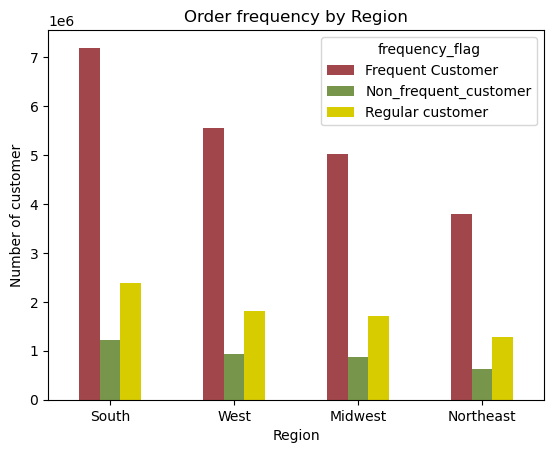

In [27]:
# Visualize this information
bar_frequency_region = frequency_region.plot.bar(color = ['#a1464b','#78964b','#d6cc00'], rot = 0)
plt.title('Order frequency by Region')
plt.xlabel('Region')
plt.ylabel('Number of customer')
plt.show()

In [28]:
# Exporting chart
bar_frequency_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_frequency_by_region.png'))

In [29]:
# Brand loyalty by region
loyalty_region = pd.crosstab(df['region'], df['loyalty_flag'], dropna = False).sort_values(by = 'Regular customer', ascending = False)

In [30]:
loyalty_region

loyalty_flag,Loyal customer,New customer,Regular customer
region,,,
South,3405844,2074405,5311631
West,2662690,1596800,4033423
Midwest,2373774,1472573,3750978
Northeast,1841785,1100207,2780744


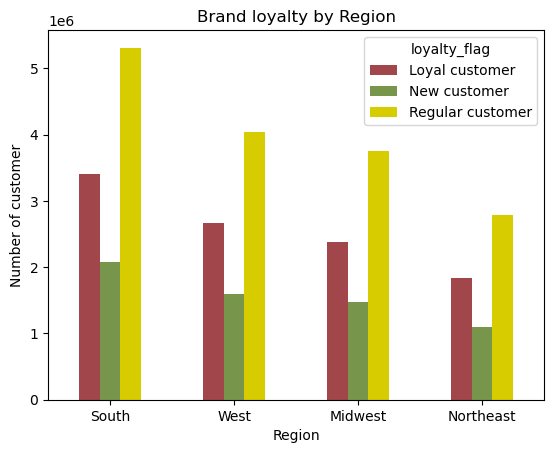

In [31]:
# Visualize this information
bar_loyalty_region = loyalty_region.plot.bar(color = ['#a1464b','#78964b','#d6cc00'], rot = 0)
plt.title('Brand loyalty by Region')
plt.xlabel('Region')
plt.ylabel('Number of customer')
plt.show()

In [32]:
# Exporting chart
bar_loyalty_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_by_region.png'))

## 05. Low-activity customers

In [33]:
# Create a flag column for low-activity customers
df.loc[df['max_order'] < 5, 'customer_activity'] = 'low activity customers'

In [34]:
df.loc[df['max_order'] >= 5, 'customer_activity'] = 'high activity customers'

In [35]:
# Check the result
df['customer_activity'].value_counts(dropna = False)

customer_activity
high activity customers    30964564
low activity customers      1440290
Name: count, dtype: int64

#### All the entries have been labeled.

In [36]:
#Creat a new dataframe contains all low-activity customer
df_low = df[df['customer_activity'] == 'low activity customers']

In [37]:
df_low.head(20)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,first_order,product_id,add_to_cart_order,reordered,...,Gender,STATE,Age,date_joined,dependants,family_status,income,_merge,region,customer_activity
1510,520620,120,1,3,11,NaN,First Order,196,2,0,...,Female,Kentucky,54,2017-03-02,2,married,99219,both,South,low activity customers
1511,3273029,120,3,2,8,19.0,Repeat Customer,196,2,1,...,Female,Kentucky,54,2017-03-02,2,married,99219,both,South,low activity customers
1512,520620,120,1,3,11,NaN,First Order,46149,1,0,...,Female,Kentucky,54,2017-03-02,2,married,99219,both,South,low activity customers
1513,3273029,120,3,2,8,19.0,Repeat Customer,46149,1,1,...,Female,Kentucky,54,2017-03-02,2,married,99219,both,South,low activity customers
1514,520620,120,1,3,11,NaN,First Order,26348,3,0,...,Female,Kentucky,54,2017-03-02,2,married,99219,both,South,low activity customers
1515,906054,120,2,4,7,15.0,Repeat Customer,31102,1,0,...,Female,Kentucky,54,2017-03-02,2,married,99219,both,South,low activity customers
1516,3273029,120,3,2,8,19.0,Repeat Customer,31102,3,1,...,Female,Kentucky,54,2017-03-02,2,married,99219,both,South,low activity customers
3855,3226575,360,1,5,12,NaN,First Order,196,1,0,...,Male,Arizona,46,2017-09-01,1,married,104257,both,West,low activity customers
3856,3046940,360,2,2,8,4.0,Repeat Customer,5322,3,0,...,Male,Arizona,46,2017-09-01,1,married,104257,both,West,low activity customers
3857,2300993,360,3,1,13,6.0,Repeat Customer,5322,2,1,...,Male,Arizona,46,2017-09-01,1,married,104257,both,West,low activity customers


In [38]:
df_low.shape #Check the number of observations

(1440290, 34)

In [39]:
#Creat a new dataframe contains all high-activity customer for further analysis
df_high = df[df['customer_activity'] == 'high activity customers']

In [40]:
df_high.shape #Check the number of observations

(30964564, 34)

In [41]:
# Export both dataframes into pickle file
df_low.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_low_activicty.pkl'))

In [42]:
df_high.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_high_activicty.pkl'))